In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from typing import Tuple, Dict, List, Union
%matplotlib inline

#### 8.8) Implement the K-means algorithm detailed and apply it to properly cluster the dataset shown in the left panel of Figure 8.13 using K = 3 cluster centroids. Visualize your results by plotting the dataset, coloring each cluster a unique color.

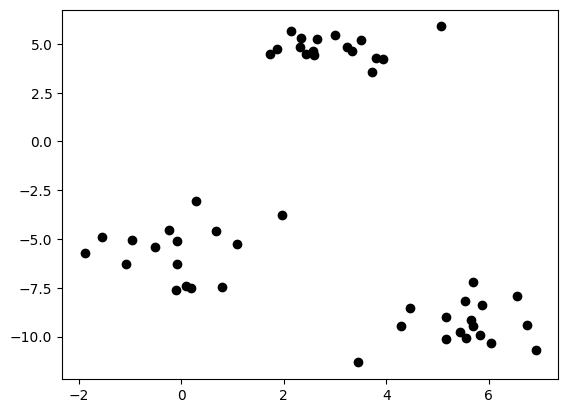

In [2]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P, centers=3, random_state=10)
data = np.transpose(blobs[0])

# scatter plot the dataset 
plt.scatter(data[0,:],data[1,:],c = 'k')
plt.show()

In [4]:
data

array([[ -0.09177178,  -1.07499229,   3.80174985,  -1.53818124,
         -0.95276902,  -0.07869027,   3.33319625,   3.71914756,
          3.51518944,   2.33382445,   0.68209926,   0.79713887,
          0.18740539,   6.04774884,   5.55912116,   3.44868458,
         -0.0957076 ,   2.13308563,   5.82662285,   6.73488595,
          5.655043  ,   1.86837356,   5.52556208,   5.15909568,
          2.99232112,   1.73353134,  -0.24564965,   3.92943696,
          5.06766836,   5.69192445,   5.4307043 ,   1.95522484,
          0.28489402,   6.55010412,   4.28981065,   0.08761591,
          4.46134719,   5.15516488,   1.07784848,   5.85943906,
          2.31046552,   3.23811737,   6.91094987,   5.69248303,
         -0.51195289,   2.56069223,  -1.88604523,   2.44078244,
          2.59184251,   2.64705936],
       [ -6.25796005,  -6.30207591,   4.27826762,  -4.88346643,
         -5.03431566,  -5.11072587,   4.62520576,   3.55752162,
          5.17965845,   5.28824759,  -4.58579794,  -7.45857921,
   

In [4]:
def inicialize_centroids(N, K):
    random_centroids = []
    for _ in range(K):
        random_centroids.append([4 * np.random.random_sample(size=None) - 2, 5 * np.random.sample(size=None) - 5])
    return np.array(random_centroids)

In [5]:
def adjust_data(data, P):
    new_data = []
    for p in range(P):
        new_data.append(data[:, p])
    return np.array(new_data)

In [6]:
def assign_points(
    centroids: np.ndarray,
    X: np.ndarray,
    P: int) -> List[Union[np.ndarray, List[np.ndarray]]]:    
    
    assignments = [[c, []] for c in centroids]

    for x_p in X:
        smallest_distance = np.linalg.norm(x_p - centroids[0])
        centroid_assignment = centroids[0]

        for c in centroids:
            distance = np.linalg.norm(x_p - c)
            # print("Distância calculada:", distance)
            if distance < smallest_distance:
                smallest_distance = distance
                centroid_assignment = c
        
        # print("Ponto: {}\nCentróide designado: {}\nDistância: {}\n".format(x_p, centroid_assignment, smallest_distance))
        
        for a in assignments:
            if np.array_equal(a[0], centroid_assignment):
                a[1].append(x_p)
                break

    return assignments

In [7]:
def recalculate_clusters_centroids(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> np.ndarray: 

    def get_mean(points: List[np.ndarray]) -> np.ndarray:
        qnt = len(points)
        ss = np.zeros(points[0].shape[0])
        for x_p in points:
            ss += x_p
        return ss / qnt

    new_centroids = []

    for i, c in enumerate(clusters):
        cluster_points = c[1]
        new_c = get_mean(cluster_points)
        new_centroids.append(new_c)

    return new_centroids

-- Iteração 1


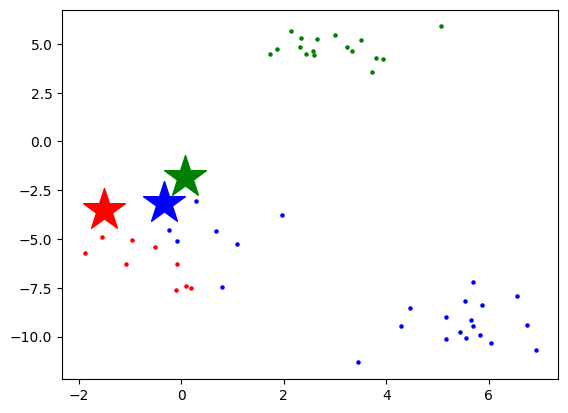

-- Iteração 2


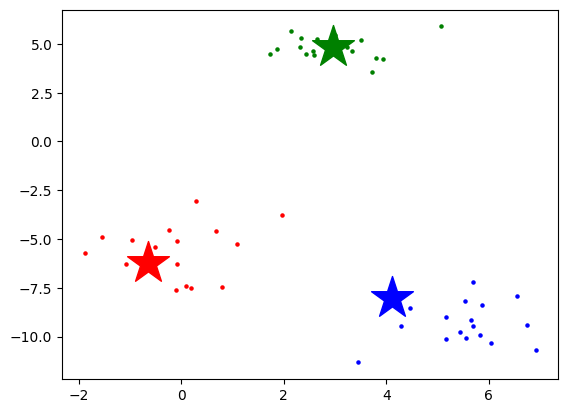

-- Iteração 3


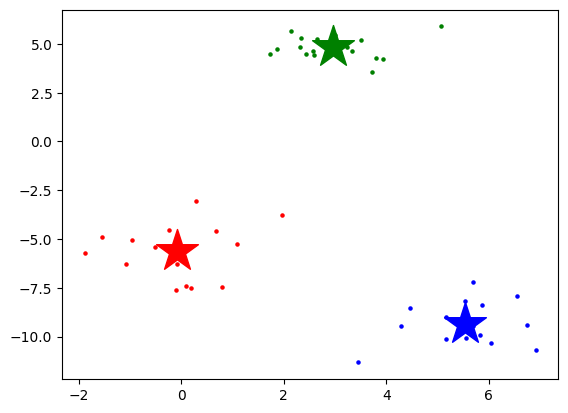

-- Iteração 4


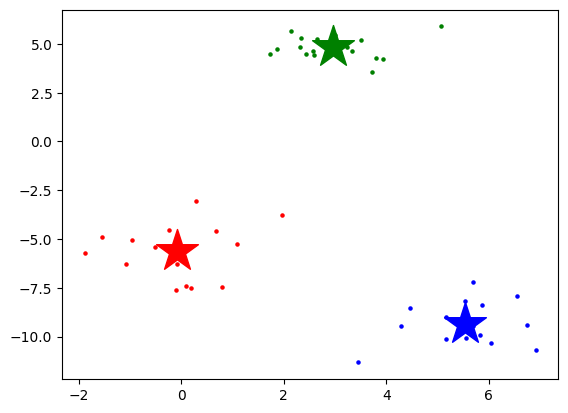

-- Iteração 5


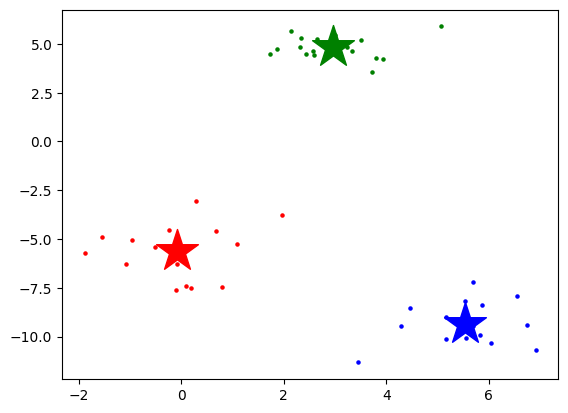

In [9]:
K = 3
N = 2
I = 5

adjusted_data = adjust_data(data, P)
initial_centroids_guess = inicialize_centroids(N, K)
centroids = initial_centroids_guess
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']

for i in range(I):
    print("-- Iteração {}".format(i + 1))
    clusters = assign_points(centroids=centroids, X=adjusted_data, P=P)
    
    ax = plt.gca();
    for index, cluster in enumerate(clusters):
        centroid, points = cluster
        ax.scatter(centroid[0], centroid[1], color = colors[index], marker="*", s=1000)
        for p in range(len(points)):
            ax.scatter(points[p][0], points[p][1], color = colors[index], s=5);
    plt.show();    
    centroids = recalculate_clusters_centroids(clusters=clusters);
